In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rand


data = pd.read_csv('SuperConductor-1.csv')
data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


In [2]:
def I(binarray,total):
    probs = []
    for col in range(0,binarray.shape[1]):
        px=np.sum(binarray[:,col])/total
        for row in range(0,binarray.shape[0]):
            py = np.sum(binarray[row,:])/total
            pxy = binarray[row,col]/total
            if py == 0 or px == 0 or pxy == 0:
                probs.append(0)
            else:
                probs.append(pxy*np.log2(pxy/px/py))
    return np.sum(probs)

In [3]:
MICmaxes = []
maxTbins = len(data['critical_temp'].drop_duplicates()) #Finds the number of unique data in that to be the max number of bins
maxColBins = len(data['mean_atomic_mass'].drop_duplicates()) #Finds the number of unique data in that to be the max number of bins
total = len(data.index)
B = total**0.6
N = 10 #Number of MICs calculated for each variable
for column in data.columns[:-1]:
    MICmax = 0
    numMICsCalcd = 0
    while numMICsCalcd < N:
        xBins =rand.randint(1,maxColBins)
        Tbins = rand.randint(1,maxTbins)    
        if xBins*Tbins < B:
            numMICsCalcd += 1
            ColStepsize = (data[column].max()-data[column].min())/xBins
            Tstepsize = (data['critical_temp'].max()-data['critical_temp'].min())/Tbins
            binArray= np.zeros((xBins,Tbins))#Creating array with number in bin
            ycounter = 0        
            for yrow in binArray:
                xcounter = 0
                    
                for xval in yrow:
                    
                    for material in data.index:
                            
                        if data.at[material,column] >= data[column].min()+ColStepsize*xcounter and data.at[material,column] <= data[column].min()+ColStepsize*(xcounter+1) and data.at[material,'critical_temp'] >= data['critical_temp'].min()+Tstepsize*ycounter and data.at[material,'critical_temp'] <= data['critical_temp'].min()+Tstepsize*(ycounter+1):
                            binArray[ycounter,xcounter] += 1
                    xcounter += 1
                        
                ycounter += 1
            if xBins > Tbins:
                Ival = I(binArray,total)
                if Tbins != 1:
                    MIC = Ival/np.log2(Tbins)
                    print(MIC)
                elif Tbins ==1 and xBins ==1:
                    MIC = 0
                    print(MIC)
                else:
                    MIC = Ival/np.log2(xBins)
                    print(MIC)
            else:
                Ival = I(binArray,total)
                if xBins != 1:
                    MIC = Ival/np.log2(xBins)
                    print(MIC)
                elif Tbins == 1 and xBins == 1:
                    MIC = 0
                    print(MIC)
                else:
                    MIC = Ival/np.log2(Tbins)
                    print(MIC)
            if MIC> MICmax:
                MICmax = MIC
    MICmaxes.append(MICmax)


0.33770956930911367
0.20702088441618177
0.08338678634538788
0.08338678634538788
0.33613558367809493
0.05944206441825601
0.010570351159170209
0.030259442358432812
0.012751913320064841
0.010838620615858136
0.17110397865422905
0.25259811721874537
0.06084011427084729
0.05939866390091395
0.23481655909153212
0.059356293269027215
0.46206592913139466
0.06738700267246191
0.39567296941207064
0.3385725028256328
0.06624585654663637
0.1584297420864732
0.3435735085945159
0.40164604855680475
0.23928825817593768
0.10079853142908034
0.027151121703335494
0.0005062145880970489
0.15307813788315117
0.07309587737651103
0.007988486985491075
0.025001144344425838
0.04078619924881999
0.018238607115148346
0.34032389197841917
0.00029945341409657884
0.07435663077306433
0.5021292307829726
0.03549227123614504
0.0012917397990267303
0.023401877855839335
0.07513799776025872
0.21831755161211241
0.0033982196889004936
0.023991015584615215
0.3415033035347629
0.0003527601931330871
0.04325872756990414
0.38760292996502765
0.0

0.10768570845686229
0.13433113120754392
0.004721043037330545
0.025211291097883937
0.02356729788824318
0.0024469596403452025
0.017530076768280268
0.19636101406826317
0.31620062910117575
0.07007460757188864
0.10436877141880956
0.002864329157036117
0.08147705071708876
0.06504538517458876
0.048142161811973574
0.018014774532580536
0.23182456370372467
0.13247868252599437
0.01976458893689585
0.13953041576660488
0.22884892648855296
0.06412179675999015
0.3188527143991851
0.13468435266947787
0.24013399569241356
0.21022848056224708
0.5292710209743673
0.08514061962051367
0.33403646229217715
0.08849435489099931
0.12591698023428158
0.4096112724036476
0.07393419615693848
0.3278121312173852
0.005215572881215613
0.2407954741787217
0.004465431672467934
0.2645643260038195
0.07965093098058433
0.02710564138673972
0.12511352003294207
0.05228733369408053
0.2685736772426057
0.08450750367971328
0.05317717697538875
0.08338678634538788
0.07753809784455501
0.012226480683999329
0.029140012434477832
0.0524804944107

In [5]:
np.savetxt("FinalMICmaxes.txt",#MICmaxes)

std_FusionHeat
0.5308796019377743


<BarContainer object of 81 artists>

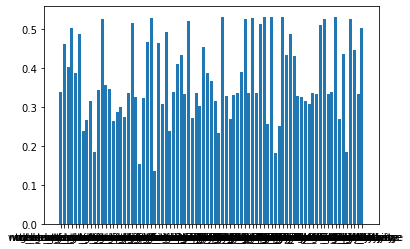

In [4]:
MICmaxes = np.genfromtxt("FinalMICmaxes.txt")
list(MICmaxes).index(MICmaxes.max())
print(data.columns[list(MICmaxes).index(MICmaxes.max())])
print(MICmaxes.max())
import matplotlib.pyplot as plt
plt.bar(data.columns[:-1],MICmaxes)

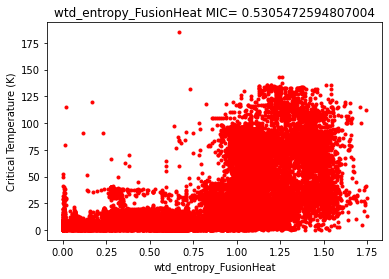

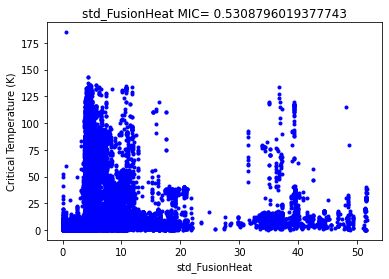

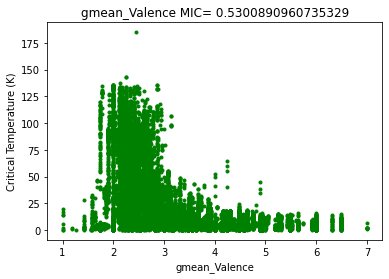

In [9]:
color = ['r','b','g']
colornum = 0
for variable, MIC in enumerate(MICmaxes):
    if MIC> 0.53:
        plt.plot(data[data.columns[variable]],data['critical_temp'],f'{color[colornum]}.')
        plt.title(f'{data.columns[variable]} MIC= {MIC}')
        plt.xlabel(f'{data.columns[variable]}')
        plt.ylabel("Critical Temperature (K)")
        plt.show()
        colornum +=1